# Image classification
In this notebook we are solving an image classification problem using Densly coupled neural net. 

The data we are going to work with is the MNIST dataset which contains 70000 handwritten numbers evenly distributed between 0-9.


In [4]:

import tensorflow as tf
import numpy as np
#import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
#import pandas as pd
from sklearn.metrics import classification_report
# Some common filses used in laboration
from common import report
# There might be some warnings when loading numpy and tensorflow
# Excecute this cell twice to supress the warning

### Load the dataset
And take a first look of the dataset by looking at the shape which gives us an idaea of the structure and size. We also show the dataset distribution.

Shape before reshape: (60000, 28, 28)
Train data: (60000, 28, 28, 1)
Test data: (10000, 28, 28, 1)


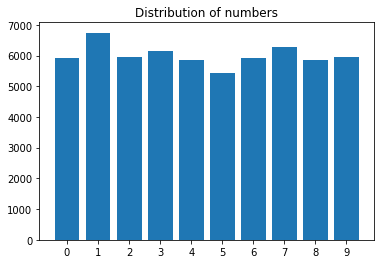

In [29]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Shape before reshape:',np.shape(x_train))
x_train = x_train.reshape(-1,28, 28, 1)   #Reshape for CNN !!
x_test = x_test.reshape(-1,28, 28, 1)     #The added dimension is to account for RRG images

##
print('Train data:',np.shape(x_train))
print('Test data:', np.shape(x_test))

y_count = np.bincount(y_train)
ii = np.nonzero(y_count)[0]
plt.bar(ii, y_count)
plt.xticks(ii)
plt.title('Distribution of numbers')
plt.show()

# Look at the dataset
It is always good to get a good overview of the dataset and explore it a little. In this case when images are going to be classified a good way is by looking at the images. If you don't trust the dataset you should go through the images and see if the classification is correct. 

Remember that there is a huge job done classifying all images. If you are going to do a classification task youself you first need to collect or create the images and then classify them. 

Note that some of the numbers are quite hard to classify even for the human eye. 

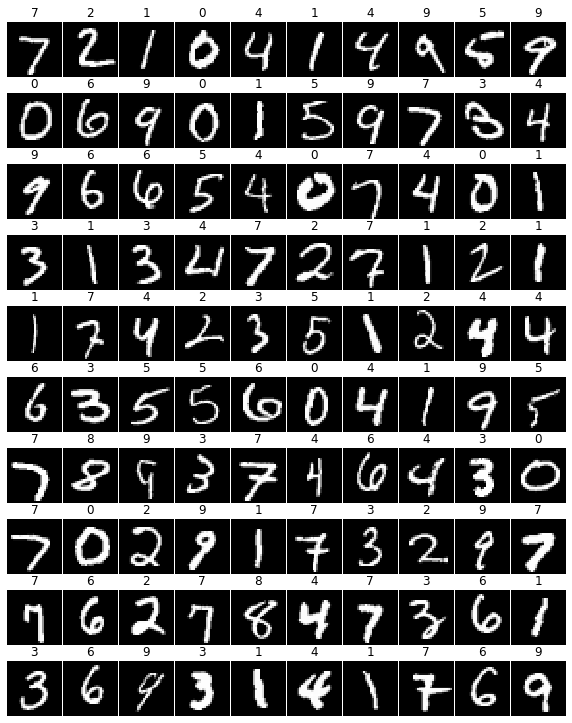

In [30]:
f,ax=plt.subplots(10, 10, figsize=(10, 10))
ax=ax.flatten()
for i in range(100):
    ax[i].imshow(x_test[i, :, :, 0], cmap='gray')
    ax[i].set_title(y_test[i])
[axi.set_axis_off() for axi in ax.ravel()]
plt.subplots_adjust(bottom=-0.09, wspace=0.03)
plt.show()

In [31]:
# Scale the dataset to have values between 0 and 1
if np.max(x_train)>1:
    x_train = x_train / 255.0
    x_test = x_test / 255.0
else:
    print('Already scaled once')

In [32]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

history=model.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=20,batch_size=512)
model.evaluate(x_test, y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 25us/sample - loss: 0.9104 - acc: 0.7118 - val_loss: 0.2958 - val_acc: 0.9146
Epoch 2/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.3774 - acc: 0.8861 - val_loss: 0.2159 - val_acc: 0.9346
Epoch 3/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2987 - acc: 0.9103 - val_loss: 0.1771 - val_acc: 0.9474
Epoch 4/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2572 - acc: 0.9226 - val_loss: 0.1557 - val_acc: 0.9520
Epoch 5/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2307 - acc: 0.9316 - val_loss: 0.1394 - val_acc: 0.9584
Epoch 6/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2123 - acc: 0.9376 - val_loss: 0.1313 - val_acc: 0.9592
Epoch 7/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1960 - acc: 0.9426 - val_loss: 0.

[0.09325735039135907, 0.9727]

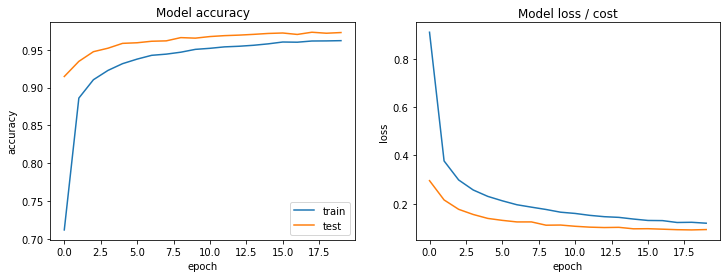

In [33]:
# summarize history for accuracy
f,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(history.history['acc'], label='train')
ax[0].plot(history.history['val_acc'], label='test')
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend()

# summarize history for loss
ax[1].plot(history.history['loss'], label='train')
ax[1].plot(history.history['val_loss'], label='test')
ax[1].set_title('Model loss / cost')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[0].legend()
plt.show()


# Evaluate the result
One way to evaluate the result is throug the confusion matrix.

10000/10000 [==============================] - 0s 15us/sample


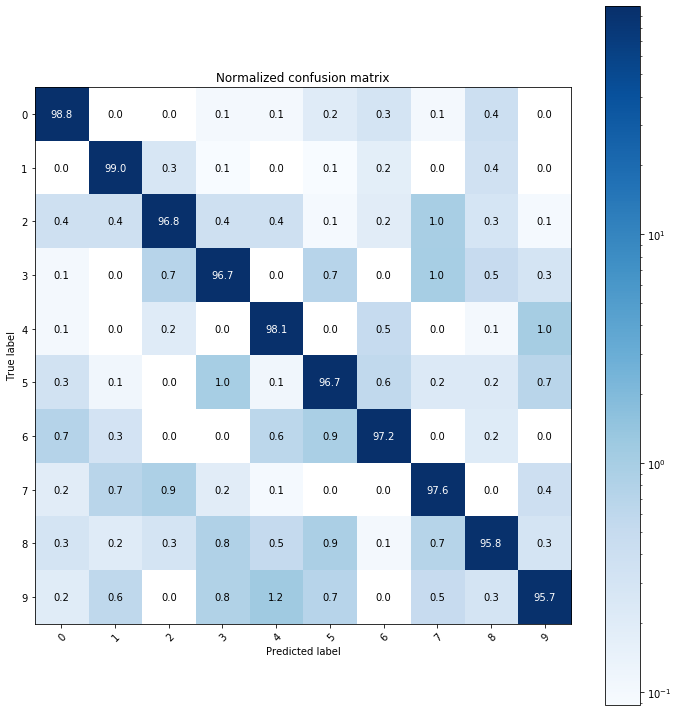

              precision    recall  f1-score   support

           0      0.977     0.988     0.982       980
           1      0.980     0.990     0.985      1135
           2      0.977     0.968     0.972      1032
           3      0.967     0.967     0.967      1010
           4      0.970     0.981     0.975       982
           5      0.960     0.967     0.964       892
           6      0.981     0.972     0.976       958
           7      0.966     0.976     0.971      1028
           8      0.975     0.958     0.966       974
           9      0.973     0.957     0.965      1009

    accuracy                          0.973     10000
   macro avg      0.973     0.972     0.972     10000
weighted avg      0.973     0.973     0.973     10000



In [34]:
from common import report, plot_confusion_matrix
class_names= np.unique(y_test)
predicted = model.predict_classes(x_test, verbose=1, batch_size=512)
plot_confusion_matrix.plot_confusion_matrix(y_test, predicted, classes=class_names, normalize=True,
                      title='Normalized confusion matrix',fig_size=10)
plt.show()
print(classification_report(y_test, predicted, digits = 3))

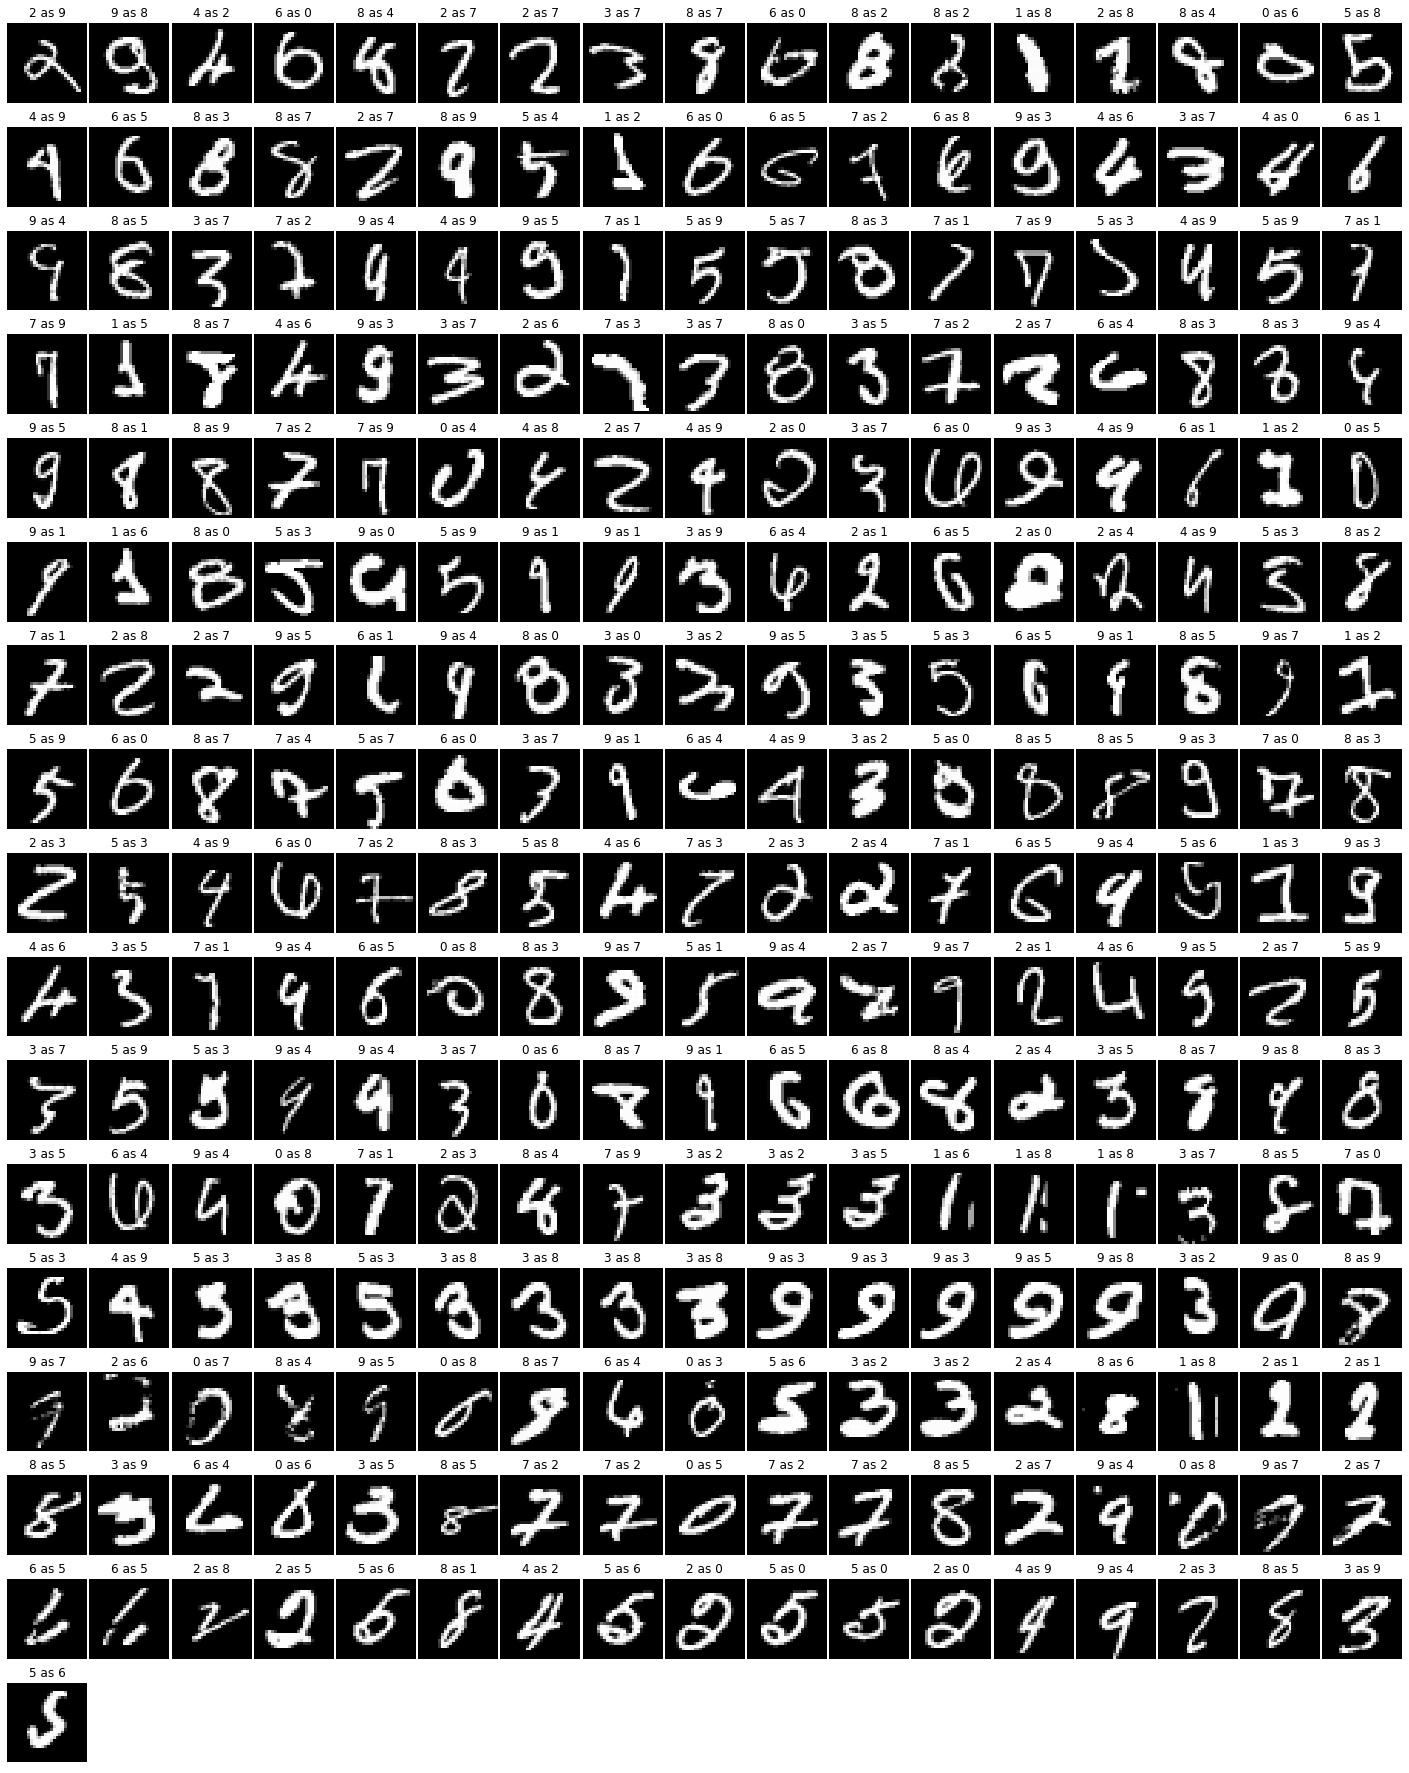

In [36]:
report.plot_errors(x_test, y_test, predicted, 600)

# Using a deeper net
We can experiment with different configurations of the artificial neural network to get some improvements. The parameters that can be modified within each layer are:
* Activation function (relu, sigmoid)
* Number of neuron in each layer (32,64,128,256)
* Fraction of Dropouts in each layer (0.1, 0.2, 0.3)

Resulting in $2*5*3=30$ combinations

Then we might want to evaluate the number of layers
* Number of layers (1, 2, 3, 5)



In [39]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy','acc'])

history1=model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5,batch_size=256)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.5784 - accuracy: 0.8194 - acc: 0.8194 - val_loss: 0.1770 - val_accuracy: 0.9459 - val_acc: 0.9459
Epoch 2/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2152 - accuracy: 0.9373 - acc: 0.9373 - val_loss: 0.1224 - val_accuracy: 0.9625 - val_acc: 0.9625
Epoch 3/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1608 - accuracy: 0.9537 - acc: 0.9537 - val_loss: 0.0980 - val_accuracy: 0.9694 - val_acc: 0.9694
Epoch 4/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1333 - accuracy: 0.9608 - acc: 0.9608 - val_loss: 0.0882 - val_accuracy: 0.9736 - val_acc: 0.9736
Epoch 5/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1148 - accuracy: 0.9657 - acc: 0.9657 - val_loss: 0.0926 - val_accuracy: 0.9724 - val_acc: 0.9724


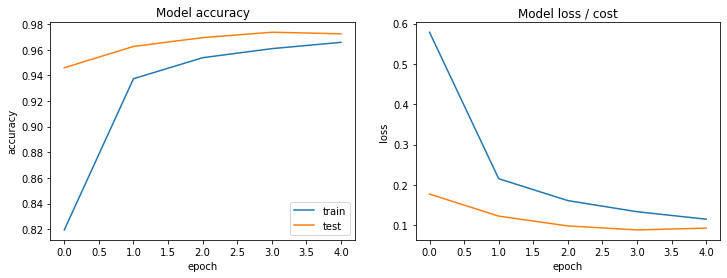

10000/10000 [==============================] - 0s 13us/sample


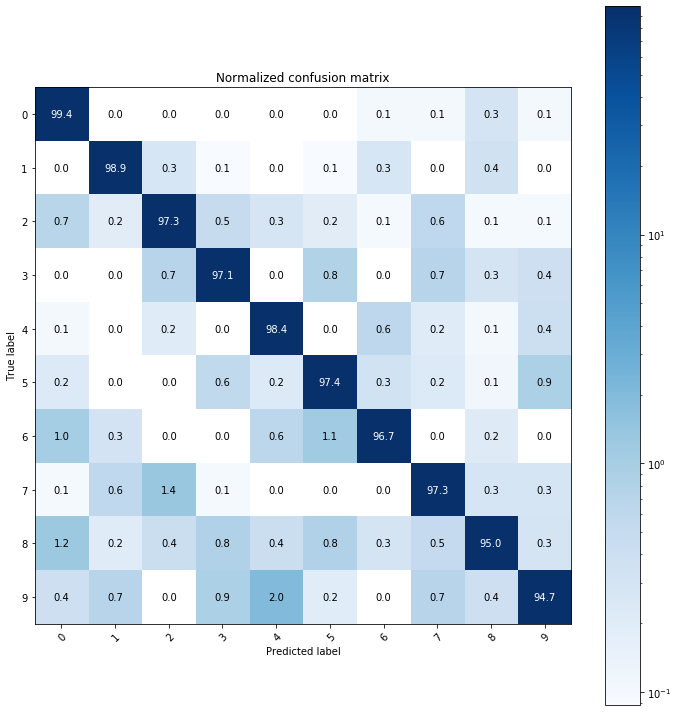

              precision    recall  f1-score   support

           0      0.963     0.994     0.978       980
           1      0.983     0.989     0.986      1135
           2      0.971     0.973     0.972      1032
           3      0.971     0.971     0.971      1010
           4      0.965     0.984     0.974       982
           5      0.964     0.974     0.969       892
           6      0.982     0.967     0.974       958
           7      0.971     0.973     0.972      1028
           8      0.977     0.950     0.963       974
           9      0.976     0.947     0.961      1009

    accuracy                          0.972     10000
   macro avg      0.972     0.972     0.972     10000
weighted avg      0.972     0.972     0.972     10000



In [44]:
# summarize history for accuracy
f,ax=plt.subplots(1,2,figsize=(12,4))
ax[0].plot(history1.history['acc'], label='train')
ax[0].plot(history1.history['val_acc'], label='test')
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend()

# summarize history for loss
ax[1].plot(history1.history['loss'], label='train')
ax[1].plot(history1.history['val_loss'], label='test')
ax[1].set_title('Model loss / cost')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[0].legend()
plt.show()

predicted1 = model1.predict_classes(x_test, verbose=1, batch_size=512)
###
plot_confusion_matrix.plot_confusion_matrix(y_test, predicted1, classes=class_names, normalize=True,
                      title='Normalized confusion matrix',fig_size=10)
plt.show()
###
conf_mat1 = confusion_matrix(y_test.flatten(), output1)

print(classification_report(y_test, output1, digits=3))

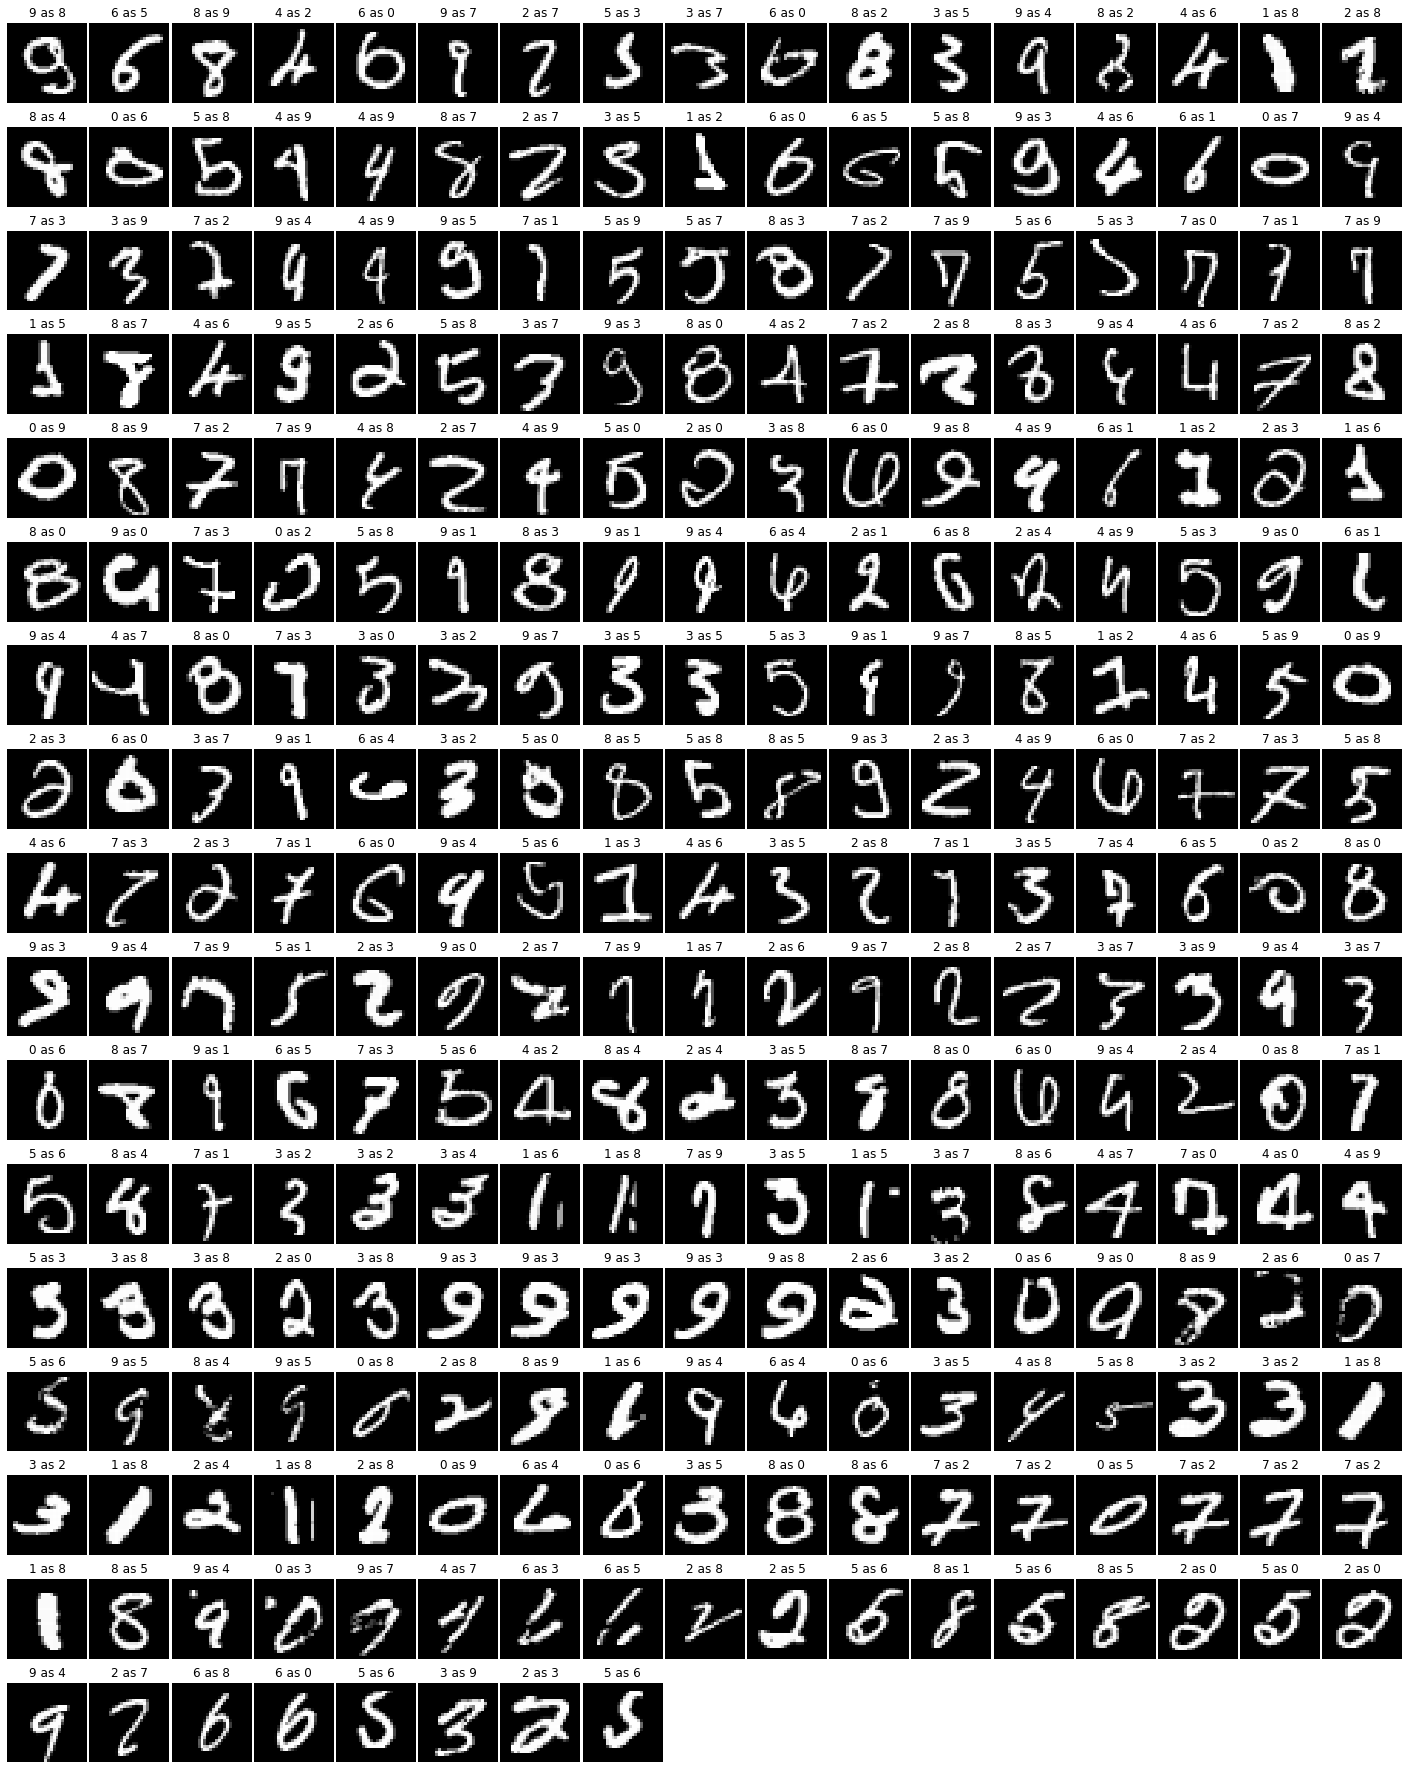

In [47]:
report.plot_errors(x_test, y_test, output,600)

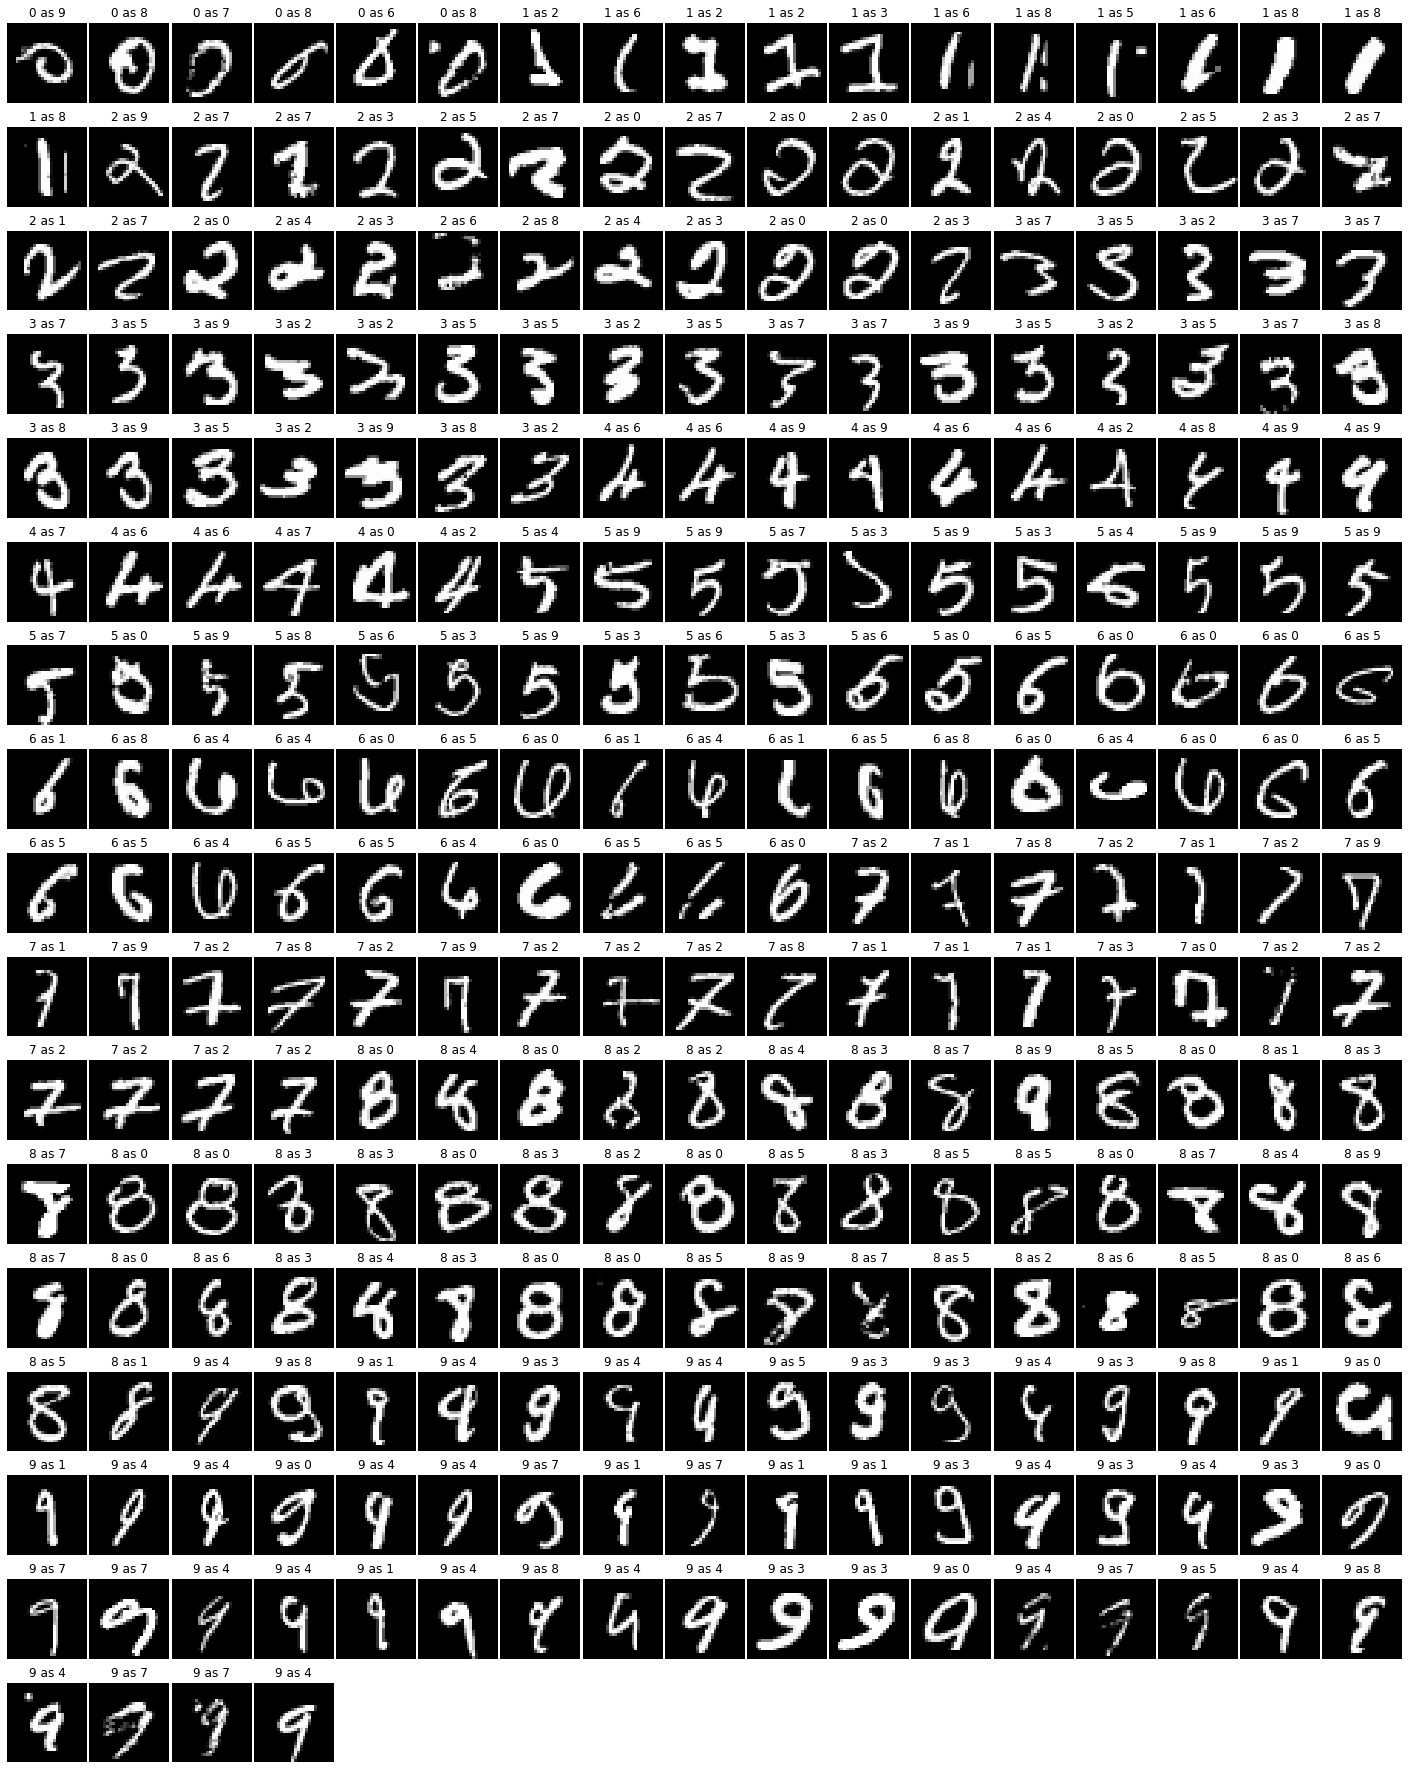

In [49]:
n_not_corr = np.sum(output1 != y_test )
n = int(np.ceil(np.sqrt(n_not_corr)))
j=0
f, ax = plt.subplots(n, n, figsize=(25, 25))
ax = ax.flatten()

# Plot all wrongly predicted numbers in order...
for NUMBER in range(10):
    for i in range(np.shape(output1)[0]):
        if (output1[i]!=y_test[i]) & (y_test[i]==NUMBER):
                ax[j].set_title(str(y_test[i]) + ' as ' + str(output1[i]))
                ax[j].imshow(x_test[i, :, :,0], cmap='gray')
                ax[j].axis('off')
                j+=1
for x in ax.ravel():
    x.axis("off")
plt.subplots_adjust(bottom=-0.09, wspace=0.03)
plt.show()